In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from statsmodels.distributions.empirical_distribution import ECDF
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C://Users/dell/.spyder-py3/Question3.1data.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # formating date
mask = df['SalesQuantity'] < 0
df['Sales'] = df['SalesQuantity'].mask(mask)
df['Returns'] = df['SalesQuantity'].mask(~mask)
df.fillna(0,inplace=True)
df.drop(['SalesQuantity'],axis=1,inplace=True)
df.drop(['StoreCode'],axis=1,inplace=True)
df_sales=df.groupby(['Date','ProductCode']).Sales.sum().reset_index()
df_returns=df.groupby(['Date','ProductCode']).Returns.sum().reset_index()

In [3]:
df_sales.set_index('Date',inplace=True)
df_sales=df_sales.groupby([pd.Grouper(freq='W'),'ProductCode'])
df_sales=df_sales['Sales'].sum().div(7)
df_sales=df_sales.to_frame()
df_sales=df_sales.reset_index(level=['Date','ProductCode'])
df_sales['Sales']=np.where(df_sales['Date']=='2015-08-02',(df_sales['Sales']*7)/6,df_sales['Sales'])
df_sales=df_sales.round(0)
df_sales.set_index('Date',inplace=True)

In [4]:
df_sales=df_sales.loc['20150111':'20150802']

df_sales=df_sales.reset_index(level=['Date'])
df_sales['isPROMO']=np.where((df_sales.Date=='2015-02-15') |(df_sales.Date=='2015-03-22')|(df_sales.Date=='2015-05-30')|(df_sales.Date=='2015-06-28'),'Yes','No')

df_sales.columns=['Date','ProductCode','Weekly_Units_Sold','Is_Promo']


In [5]:
df_sales.drop('Is_Promo',axis=1,inplace=True)

In [6]:
df_sales.head()

,Date,ProductCode,Weekly_Units_Sold
0,2015-01-11,1,49.0
1,2015-01-11,2,35.0
2,2015-01-11,3,33.0
3,2015-01-11,4,40.0
4,2015-01-11,5,53.0


In [7]:
df_3 = pd.read_csv('C://Users/dell/.spyder-py3/Question3.3data.csv')
df_3['Date'] = pd.to_datetime(df_3['Date'], format='%Y-%m-%d') # formating date
mask = df_3['SalesQuantity'] < 0
df_3['Sales'] = df_3['SalesQuantity'].mask(mask)
df_3['Returns'] = df_3['SalesQuantity'].mask(~mask)
df_3.fillna(0,inplace=True)
df_3.drop(['SalesQuantity'],axis=1,inplace=True)
df_3.drop(['StoreCode'],axis=1,inplace=True)
df_sales_3=df_3.groupby(['Date','ProductCode']).Sales.sum().reset_index()
df_returns_3=df_3.groupby(['Date','ProductCode']).Returns.sum().reset_index()

In [8]:
df_sales_3.head()

,Date,ProductCode,Sales
0,2015-08-01,1,50.0
1,2015-08-01,2,25.0
2,2015-08-01,3,12.0
3,2015-08-01,4,30.0
4,2015-08-01,5,34.0


In [9]:
df_sales_3.set_index('Date',inplace=True)
df_sales_3=df_sales_3.groupby([pd.Grouper(freq='W'),'ProductCode'])
df_sales_3=df_sales_3['Sales'].sum().div(7)
df_sales_3=df_sales_3.round(0)

In [10]:
df_sales_3=df_sales_3.loc['20150809':'20151227']
df_sales_3=df_sales_3.to_frame()
df_sales_3=df_sales_3.reset_index(level=['Date','ProductCode'])
df_sales_3.columns=['Date','ProductCode','Weekly_Units_Sold']
df_concat=pd.concat([df_sales,df_sales_3],ignore_index=True)

In [11]:
df_sales_3.head()

,Date,ProductCode,Weekly_Units_Sold
0,2015-08-09,1,46.0
1,2015-08-09,2,46.0
2,2015-08-09,3,31.0
3,2015-08-09,4,32.0
4,2015-08-09,5,47.0


In [12]:
# df_sales_3=df_sales_3.query('ProductCode==110')
# df_sales_3.head()
df_sales=df_sales[df_sales['ProductCode']==218]
df_sales

,Date,ProductCode,Weekly_Units_Sold
196,2015-01-11,218,1721.0
476,2015-01-18,218,1708.0
765,2015-01-25,218,1565.0
1055,2015-02-01,218,1851.0
1338,2015-02-08,218,1758.0
1623,2015-02-15,218,2791.0
1912,2015-02-22,218,1641.0
2200,2015-03-01,218,1675.0
2489,2015-03-08,218,1921.0
2780,2015-03-15,218,1896.0


In [13]:
df_sales.drop('ProductCode',axis=1,inplace=True)
df_sales.Weekly_Units_Sold.max()

3230.0

In [14]:
df_sales=df_sales[['Date','Weekly_Units_Sold']].rename(columns={'Date':'ds','Weekly_Units_Sold':'y'})

In [15]:
model=Prophet(interval_width=0.95)
model.fit(df_sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [16]:
future_dates = model.make_future_dataframe(periods = 20, freq='W')
future_dates['cap']=100
future_dates['floor']=0
future_dates.head(7)

,ds,cap,floor
0,2015-01-11,100,0
1,2015-01-18,100,0
2,2015-01-25,100,0
3,2015-02-01,100,0
4,2015-02-08,100,0
5,2015-02-15,100,0
6,2015-02-22,100,0


In [17]:
forecast = model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
43,2015-11-08,1261.499976,491.287941,2088.655021
44,2015-11-15,1243.719509,454.744927,2034.097188
45,2015-11-22,1225.939041,390.181077,1990.913228
46,2015-11-29,1208.158573,458.104255,1994.089395
47,2015-12-06,1190.378106,418.982338,1968.190550
48,2015-12-13,1172.597638,432.215529,1929.682602
49,2015-12-20,1154.817170,379.506583,2001.105814


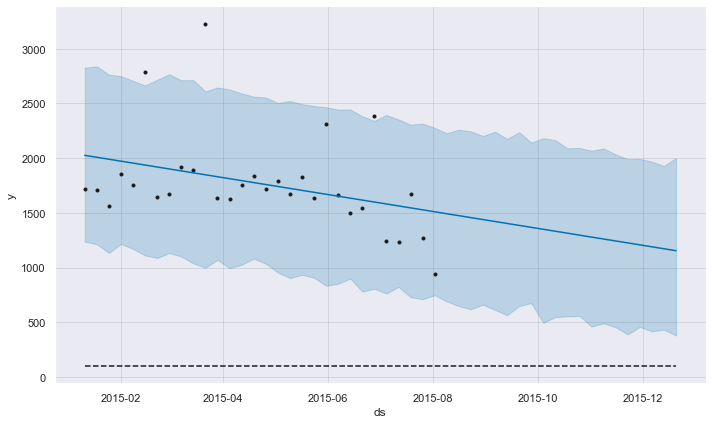

In [18]:
model.plot(forecast);

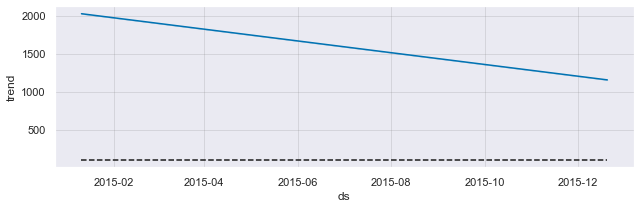

<Figure size 720x360 with 0 Axes>

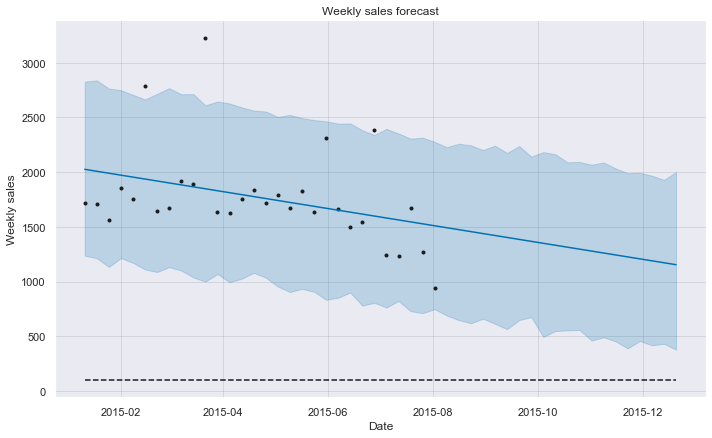

In [19]:
model.plot_components(forecast);

plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'Weekly sales')
plt.title('Weekly sales forecast');

In [20]:
df_sales_3.head()

,Date,ProductCode,Weekly_Units_Sold
0,2015-08-09,1,46.0
1,2015-08-09,2,46.0
2,2015-08-09,3,31.0
3,2015-08-09,4,32.0
4,2015-08-09,5,47.0


In [21]:
df_sales_3=df_sales_3.query('ProductCode==218')
df_sales_3.drop('ProductCode',axis=1,inplace=True)
df_sales_3=df_sales_3[['Date','Weekly_Units_Sold']].rename(columns={'Date':'ds','Weekly_Units_Sold':'y'})
df_sales_3


,ds,y
202,2015-08-09,1228.0
485,2015-08-16,1215.0
777,2015-08-23,1221.0
1059,2015-08-30,1055.0
1344,2015-09-06,1616.0
1628,2015-09-13,1098.0
1915,2015-09-20,923.0
2198,2015-09-27,948.0
2483,2015-10-04,961.0
2766,2015-10-11,817.0


In [22]:
metric_df = forecast.set_index('ds')[['yhat']].join(df_sales_3.set_index('ds').y).reset_index()


In [23]:
metric_df.dropna(inplace=True)

In [24]:
metric_df.head()

,ds,yhat,y
30,2015-08-09,1492.646056,1228.0
31,2015-08-16,1474.865588,1215.0
32,2015-08-23,1457.085121,1221.0
33,2015-08-30,1439.304653,1055.0
34,2015-09-06,1421.524185,1616.0


In [25]:
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(np.sqrt(error)))
# print('The RMSE is {}'. format(np.sqrt(error)))
print(metric_df['y'].mean())


The RMSE is 400.9998679156378
954.75


In [26]:
metric_df[metric_df['ds']=='2015-11-22']

,ds,yhat,y
45,2015-11-22,1225.939041,731.0


In [27]:
df_sales['ds'] = pd.to_datetime(df_sales['ds'], format='%Y-%m-%d') # formating datedf_sales['Promo_Week'] =np.where((df_sales.ds=='2015-02-15') |(df_sales.ds=='2015-03-22')|(df_sales.ds=='2015-05-31')|(df_sales.ds=='2015-06-28'),True,False)
df_sales['Non_Promo_Week'] =np.where((df_sales.ds=='2015-02-15') |(df_sales.ds=='2015-03-22')|(df_sales.ds=='2015-05-31')|(df_sales.ds=='2015-06-28'),False,True)


In [28]:

promo = pd.DataFrame({'holiday': "Promo event",
                      'ds' : pd.to_datetime(['2015-02-10','2015-03-15','2015-05-24','2015-06-21']),
                      'lower_window': 0,
                      'upper_window': 7})
future_promo = pd.DataFrame({'holiday': "Promo event",
                      'ds' : pd.to_datetime(['2015-01-09','2015-11-21']),
                      'lower_window': 0,
                      'upper_window': 7})
promos_hypothetical = pd.concat([promo, future_promo])
model = Prophet(interval_width=0.95,holidays=promos_hypothetical)
model.add_country_holidays(country_name='TU')
model.add_seasonality(name='Promo_Week', period=35, fourier_order=4,condition_name='Promo_Week')
model.add_seasonality(name='Non_Promo_Week', period=35, fourier_order=1, condition_name='Non_Promo_Week')
model.fit(df_sales)




INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [29]:
forecast = model.make_future_dataframe(periods=21, freq='W')
# forecast['not_Spring_Season'] = ~forecast['ds'].apply(is_springseason)
# forecast['Spring_Season'] = forecast['ds'].apply(is_springseason)

forecast['Promo_Week'] = np.where((forecast.ds=='2015-09-06') |(forecast.ds=='2015-11-29'),True,False)
forecast['Non_Promo_Week'] =np.where((forecast.ds=='2015-09-06') |(forecast.ds=='2015-11-29'),False,True)

In [30]:

forecast = model.predict(forecast)


<Figure size 720x360 with 0 Axes>

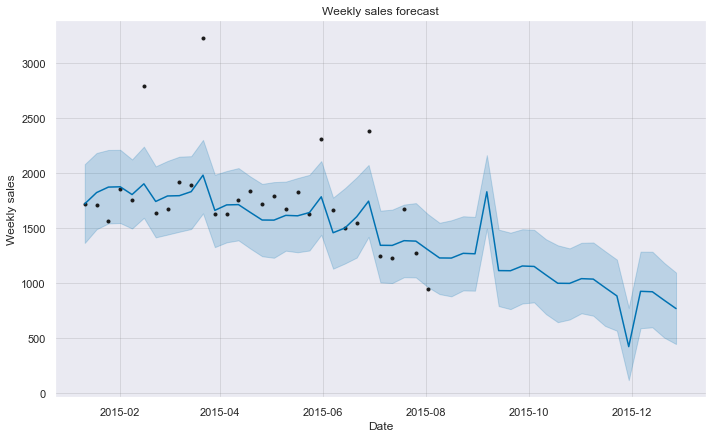

In [31]:
plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'Weekly sales')
plt.title('Weekly sales forecast');

In [32]:
df_sales_3

,ds,y
202,2015-08-09,1228.0
485,2015-08-16,1215.0
777,2015-08-23,1221.0
1059,2015-08-30,1055.0
1344,2015-09-06,1616.0
1628,2015-09-13,1098.0
1915,2015-09-20,923.0
2198,2015-09-27,948.0
2483,2015-10-04,961.0
2766,2015-10-11,817.0


In [33]:
metric_df = forecast.set_index('ds')[['yhat']].join(df_sales_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(np.sqrt(error)))

The RMSE is 163.84171262767998


In [34]:
metric_df

,ds,yhat,y
30,2015-08-09,1229.612154,1228.0
31,2015-08-16,1228.561039,1215.0
32,2015-08-23,1271.522703,1221.0
33,2015-08-30,1267.372831,1055.0
34,2015-09-06,1830.081875,1616.0
35,2015-09-13,1114.729602,1098.0
36,2015-09-20,1113.678487,923.0
37,2015-09-27,1156.640151,948.0
38,2015-10-04,1152.490279,961.0
39,2015-10-11,1075.211096,817.0


In [35]:
len(df_sales_3)

21

In [36]:
len(metric_df)

21

In [37]:
metric_df[metric_df['ds']=='2015-11-22']

,ds,yhat,y
45,2015-11-22,884.964499,731.0
